<a href="https://colab.research.google.com/github/changsin/MIU_ML/blob/main/notebooks/07.k_means_clustering_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering From Scratch
K-Means clustering is an iterative method to find clusters based on distances from the center point of each cluster called 'centroids'.

The algorithm is as follows:

1. Pick two random points as the initial centroids.
2. Put each data point to a cluster based on the distances between the centroids.
3. For each cluster, calculate the real centroids.
4. With the new centroids, regroup the points.
5. If any point changed its cluster with the new centroids, repeat 3-5.
6. If there is no change, you are done.

The following code implements the above algorithm with visualizations.

## 1. Generate sample points data

Intentionally create two sets of data points: between 0-5 and 6-10. We expect there should be two natural clusters.

In [4]:
import numpy as np

def gen_random_points(start, end, size):
  points = []

  while len(points) < size[0]:
    pt = np.random.randint(start, end, size=(1, size[1]))[0].tolist()

    # check for duplicates
    if pt in points:
      continue

    points.append(pt)

  return np.array(points)   

data1 = gen_random_points(0, 5, size=(5, 2))
data1
data2 = gen_random_points(6, 10, size=(5, 2))
data2

data = np.vstack((data1, data2))
print(data)

[[1 3]
 [4 2]
 [3 4]
 [0 2]
 [3 0]
 [9 9]
 [7 6]
 [6 8]
 [6 9]
 [8 9]]


## 2. Pick random points as centroids

In [5]:
centroids = gen_random_points(0, 10, size=(2, 2))
# centroids = np.array([[2, 2], [4, 2]])

## 3. Cluster data points based on distances to the centroids
To visualize the clustering process better, let's draw a middle line between two centroids which will be the dividing line between two clusters. Below is the formula to draw the dividing line. 

- Calculate the median point between the two centroids

In [6]:
def calc_midpoint(p1, p2):
  return (p1[0] + p2[0])/2, (p1[1] + p2[1])/2

- Some geometry methods to calculate the slope and y intercept of the dividing line.
 
 $$ y = sx + c $$

s is the slope and calculated with
- $ s = \frac{\text{x change}}{\text{y change}} $

c is the y-intercept
- $ c = y - sx $

The dividing line will be perpendicular to the line connecting two centroids so we will first come up with the connecting line formula and from there, we will calculate the perpendicular line passing through the median point of the two centroids.

So the dividing line will be

$$ y = mx + b $$

where
- $ m = \Large{ -\frac{1}{s}} $
- $ b = y - mx $

In [7]:
def get_slope(pt1, pt2):
  """
  calculates the slope given two points
  """
  denominator = pt1[0] - pt2[0]
  numerator = pt1[1] - pt2[1]

  if denominator != 0:
    return float(numerator/denominator)

  # this can happen when there is no y-change: i.e., a constant vertical line
  print("divide by zero error {} {}".format(pt1, pt2))
  return pt1[0]

def get_y_int(pt, m):
  """
  calculates the y-intercept given a point and the slope
  """
  return pt[1] - m * pt[0]

Let's now use the above methods to calculate the line formula for the dividing line.

In [8]:
def calc_dividing_line(pt1, pt2):
  n = get_slope(pt1, pt2)
  c = get_y_int(pt2, n)

  if n != 0:
    m = -1/n
  else:
    m = 0

  mid = calc_midpoint(pt1, pt2)
  b = get_y_int(mid, m)

  return m, b

In [9]:
a = [3, 5, 2, 1]
b = [5, 3, 1, 2]
a.sort() == b.sort()

True

In [10]:
def cluster_two(points, m, b):
  """
  Clusters each point given the diving line formula
  """
  cluster1 = []
  cluster2 = []
  # for each point, check if it's above and below the line
  for pt in points:
    x, y = pt
    y1 = m*x + b

    if y1 > y:
      print("x, y is cluster1", x, y, "y1", y1)
      cluster1.append(pt)
    else:
      print("x, y is cluster2", x, y, "y1", y1)
      cluster2.append(pt)

  clusters = dict()
  # sort the points array first by x-value then y-value
  clusters[0] = np.array(sorted(cluster1, key=lambda k: [k[0], k[1]]))
  clusters[1] = np.array(sorted(cluster2, key=lambda k: [k[0], k[1]]))

  return clusters

In [11]:
def distance_euc(pt1, pt2):
  """
  calculates the Euclidean distance between the two points
  """
  x1, y1 = pt1
  x2, y2 = pt2
  return ((((x2 - x1 )**2) + ((y2 - y1)**2) )**0.5)

def calc_distances(pt, centroids):
  distances = []
  for centroid in centroids:
    distances.append(distance_euc(pt, centroid))
  
  return distances

def cluster_with_distance(data, centroids):
  clusters = {}

  for pt in data:
    distances = calc_distances(pt, centroids)
    # print(distances)
    id = np.argmin(distances)

    if id in clusters.keys():
      clusters[id].append(pt.tolist())
    else:
      clusters[id] = [pt.tolist()]

  for id, vals in clusters.items():
    clusters[id] = np.array(sorted(clusters[id], key=lambda k: [k[0], k[1]]))

  return clusters

In [12]:
def cluster_with_centroids(data, centroids, use_distance=False):
  if centroids[0][1] == centroids[1][1]:
    print("vertical line")
    m, b = None, None
    use_distance = True
  else:
    m, b = calc_dividing_line(centroids[0], centroids[1])
    y1 = m*data + b

  if use_distance:
    clusters = cluster_with_distance(data, centroids)
  else:
    clusters = cluster_two(data, m, b)

  return clusters, m, b

In [13]:
clusters, m, b = cluster_with_centroids(data, centroids)
clusters

x, y is cluster1 1 3 y1 4.357142857142857
x, y is cluster1 4 2 y1 3.4999999999999996
x, y is cluster2 3 4 y1 3.785714285714285
x, y is cluster1 0 2 y1 4.642857142857142
x, y is cluster1 3 0 y1 3.785714285714285
x, y is cluster2 9 9 y1 2.071428571428571
x, y is cluster2 7 6 y1 2.6428571428571423
x, y is cluster2 6 8 y1 2.928571428571428
x, y is cluster2 6 9 y1 2.928571428571428
x, y is cluster2 8 9 y1 2.3571428571428568


{0: array([[0, 2],
        [1, 3],
        [3, 0],
        [4, 2]]), 1: array([[3, 4],
        [6, 8],
        [6, 9],
        [7, 6],
        [8, 9],
        [9, 9]])}

In [14]:
clusters_dist, m, b = cluster_with_centroids(data, centroids, use_distance=True)
clusters_dist

{0: array([[0, 2],
        [1, 3],
        [3, 0],
        [4, 2]]), 1: array([[3, 4],
        [6, 8],
        [6, 9],
        [7, 6],
        [8, 9],
        [9, 9]])}

- Let's generate x coordinates for plotting a line graph.

In [15]:
x1 = np.linspace(0, 10, 100)


### Cluster
For each point, we can calculate the distances and decide the proper cluster, but this is equivalent to drawing a dividing line and checking if it is above or below the line. Let's use the latter method to make visualization easier.

In [29]:
data = np.array([[3, 3],
       [2, 4],
       [3, 1],
       [1, 1],
       [0, 4],
       [8, 8],
       [9, 7],
       [6, 9],
       [6, 7],
       [7, 7]])

In [30]:
centroids = np.array([[4, 0],
       [1, 5]])

In [31]:
clusters, m, b = cluster_with_centroids(data, centroids)

x, y is cluster2 3 3 y1 2.8
x, y is cluster2 2 4 y1 2.2
x, y is cluster1 3 1 y1 2.8
x, y is cluster1 1 1 y1 1.6
x, y is cluster2 0 4 y1 1.0
x, y is cluster2 8 8 y1 5.8
x, y is cluster2 9 7 y1 6.3999999999999995
x, y is cluster2 6 9 y1 4.6
x, y is cluster2 6 7 y1 4.6
x, y is cluster2 7 7 y1 5.2


### Plot
Now let's plot.

In [32]:
import matplotlib.pyplot as plt

def plot_data(data, ax=None, label='+'):
  if not ax:
    fig, ax = plt.subplots()
  
  ax.plot(data[:, 0], data[:, 1], marker='o', linestyle='', ms=12, label=label)

  return ax

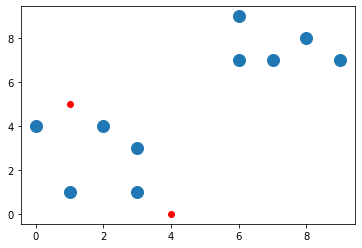

In [33]:
ax1 = plot_data(data)
ax1.scatter(centroids[:, 0], centroids[:, 1], color='red')

In [34]:
def plot_clusters_with_line(clusters, centroids, x1, m, b):
  fig, ax = plt.subplots()
  for id, cluster in clusters.items():
    ax = plot_data(cluster, ax=ax)

  ax.scatter(centroids[:, 0], centroids[:, 1], color='red')

  mid = calc_midpoint(centroids[0], centroids[1])
  ax.scatter(mid[0], mid[1], color='orange')

  if centroids[0, 1] == centroids[1, 1]:
    # ax.axvline(x=mid)
    ax.vlines(x=[mid[0]], ymin=0, ymax=10, color='g')
  else:
    y1 = m*x1 + b
    ax.plot(x1, y1, 'g', label='y=wx+b')

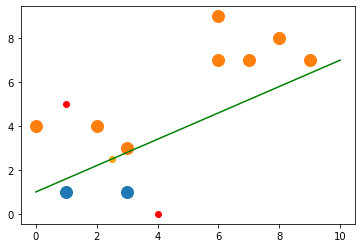

In [35]:
plot_clusters_with_line(clusters, centroids, x1, m, b)

Obviously, the clustering is not what we expect so more iterations are needed.

## 4. Recalculate the centroids
First we need to calculate the centroids again based on the cluster results.

In [36]:
def calculate_centroids(clusters):
  """
  Re-calculate the centroids
  """
  def _centroidnp(arr):
      length = arr.shape[0]
      sum_x = np.sum(arr[:, 0])
      sum_y = np.sum(arr[:, 1])
      return np.array([float(sum_x/length), float(sum_y/length)])

  centroids = []
  for id, points in clusters.items():
    centroid = _centroidnp(points)
    centroids.append(centroid)

  return np.array(centroids)

## 5. Iterate till there is no reclustering
Then loop till there is no more re-clustering.

In [37]:
def cluster_equals(cl1, cl2):
  """
  Check if the two clusters are equal
  """
  if cl1.keys() != cl2.keys():
    return False

  for key1, vals1 in cl1.items():
    if key1 not in cl2.keys():
      return False
    vals2 = cl2[key1]
    if vals1.tolist() != vals2.tolist():
      return False

  return True

cluster_equals(clusters, clusters)

True

In [38]:
clusters

{0: array([[1, 1],
        [3, 1]]), 1: array([[0, 4],
        [2, 4],
        [3, 3],
        [6, 7],
        [6, 9],
        [7, 7],
        [8, 8],
        [9, 7]])}

x, y is cluster1 3 3 y1 3.9054878048780486
x, y is cluster1 2 4 y1 4.515243902439024
x, y is cluster1 3 1 y1 3.9054878048780486
x, y is cluster1 1 1 y1 5.125
x, y is cluster1 0 4 y1 5.734756097560975
x, y is cluster2 8 8 y1 0.8567073170731705
x, y is cluster2 9 7 y1 0.24695121951219523
x, y is cluster2 6 9 y1 2.076219512195122
x, y is cluster2 6 7 y1 2.076219512195122
x, y is cluster2 7 7 y1 1.4664634146341458


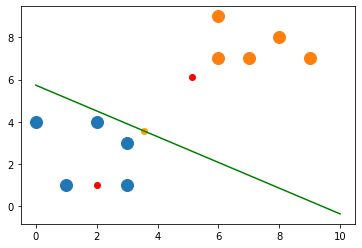

In [39]:
# calculate new centroids
centroids_new = calculate_centroids(clusters)
clusters_new, m_new, b_new = cluster_with_centroids(data, centroids_new)
plot_clusters_with_line(clusters_new, centroids_new, x1, m_new, b_new)


Calculating centroids and clustering again
x, y is cluster1 3 3 y1 6.720000000000001
x, y is cluster1 2 4 y1 7.800000000000001
x, y is cluster1 3 1 y1 6.720000000000001
x, y is cluster1 1 1 y1 8.88
x, y is cluster1 0 4 y1 9.96
x, y is cluster2 8 8 y1 1.3200000000000003
x, y is cluster2 9 7 y1 0.2400000000000002
x, y is cluster2 6 9 y1 3.4800000000000004
x, y is cluster2 6 7 y1 3.4800000000000004
x, y is cluster2 7 7 y1 2.4000000000000004
Clustering is finished


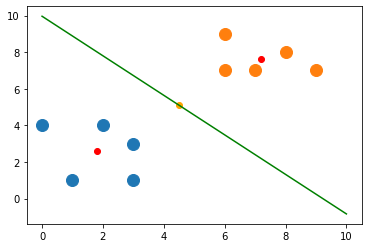

In [40]:
# we can check either centroids or clusters equality
while not cluster_equals(clusters, clusters_new):
  clusters = clusters_new
  centroids = centroids_new

  print("Calculating centroids and clustering again")
  # calculate new centroids
  centroids_new = calculate_centroids(clusters)
  clusters_new, m, b = cluster_with_centroids(data, centroids_new)
  plot_clusters_with_line(clusters_new, centroids_new, x1, m, b)

print("Clustering is finished")

In [41]:
centroids_new

array([[1.8, 2.6],
       [7.2, 7.6]])

## Verify

Let's check if our answers are correct against the sklearn library's KMeans clustering algorithm. Voila! The answers match exactly. Woohoo!

In [ ]:
from sklearn.cluster import KMeans

sk_kmeans = KMeans(n_clusters=2, random_state=0)
sk_clusters = sk_kmeans.fit(data)

In [ ]:
sk_clusters.cluster_centers_

array([[1.8, 2.6],
       [7.2, 7.6]])